- Preparación del entorno de trabajo

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, OrdinalEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve,auc, silhouette_score, mean_squared_error
from sklearn.cluster import KMeans
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from IPython.display import display
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l1_l2, l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

## 1. Exploración y preprocesamiento de datos:

- Carga y exploración del dataset

In [3]:
# Carga del Dataset en el entorno de trabajo

import pandas as pd
import os

# Defino la ruta base
base_dir = r"C:/Users/diego/OneDrive/Documentos/GitHub/Proyecto Final"  # Ruta ajustada con raw string

# Defino las carpetas de los datasets
stock_dir = os.path.join(base_dir, "stock")
super6_dir = os.path.join(base_dir, "super6")

# Listas para almacenar los DataFrames
stock_dfs = []
super6_dfs = []

# Cargo todos los archivos de stock_data
for file in os.listdir(stock_dir):
    if file.endswith(".csv"):
        file_path = os.path.join(stock_dir, file)
        try:
            df = pd.read_csv(file_path)
            df['supermercado'] = 'stock'  # Agregar columna para identificar el origen
            stock_dfs.append(df)
        except Exception as e:
            print(f"Error al leer {file_path}: {e}")
            continue

# Cargo todos los archivos de super6_data
for file in os.listdir(super6_dir):
    if file.endswith(".csv"):
        file_path = os.path.join(super6_dir, file)
        try:
            df = pd.read_csv(file_path)
            df['supermercado'] = 'super6'  # Agregar columna para identificar el origen
            super6_dfs.append(df)
        except Exception as e:
            print(f"Error al leer {file_path}: {e}")
            continue

# Concateno todos los DataFrames de stock_data en uno solo
stock_df = pd.concat(stock_dfs, ignore_index=True)

# Concateno todos los DataFrames de super6_data en uno solo
super6_df = pd.concat(super6_dfs, ignore_index=True)

# Consolido ambos datasets en un solo DataFrame
consolidated_df = pd.concat([stock_df, super6_df], ignore_index=True)

# Estandarizo la columna de fecha, agrego una nueva columna llamada mes año, donde extraigo la información del mes de Run_date
consolidated_df['mes'] =pd.to_datetime(consolidated_df['run_date'], format='%d/%m/%y', errors='coerce').dt.strftime('%m')

# Guardar el dataset consolidado
consolidated_df.to_csv(os.path.join(base_dir, "consolidated_data.csv"), index=False)


In [4]:
# Verificación de las primeras filas del
consolidated_df.head(30)

,category,prod_name,prod_price,product_picture,run_date,supermercado,mes
0,Vacuna,HAMBURGUESA DE CARNE 4 UN EFEGE CJA,Gs 5.900,https://www.stock.com.py/images/thumbs/0208524...,31/3/24,stock,03
1,Vacuna,HAMBURGUESA CLASICA CONCEPCION BURGER 6UN CJA,Gs 19.900,https://www.stock.com.py/images/thumbs/0207171...,31/3/24,stock,03
2,Vacuna,MINI HAMBURGUESA GUARANI 12UN CJA,Gs 28.900,https://www.stock.com.py/images/thumbs/0206752...,31/3/24,stock,03
3,Vacuna,HAMBURGUESA PREMIUM X 12UN GUARANI CJA,Gs 58.700,https://www.stock.com.py/images/thumbs/0206750...,31/3/24,stock,03
4,Vacuna,HAMBURGUESA GUARANI PREMIUM 6UN,Gs 29.900,https://www.stock.com.py/images/thumbs/0206749...,31/3/24,stock,03
5,Vacuna,HAMBURGUESA PARRILLERA XXL GUARANI 4UND,Gs 44.700,https://www.stock.com.py/images/thumbs/0206748...,31/3/24,stock,03
6,Vacuna,HAMBURGUESA PARRILLERA XXL GUARANI 2 UNIDADES,Gs 24.500,https://www.stock.com.py/images/thumbs/0206747...,31/3/24,stock,03
7,Vacuna,HAMBURGUESA GUARANI PARRILLERA 24 UN,Gs 110.700,https://www.stock.com.py/images/thumbs/0206746...,31/3/24,stock,03
8,Vacuna,HAMBURGUESA PARRILLERA GUARANI,Gs 30.900,https://www.stock.com.py/images/thumbs/0206745...,31/3/24,stock,03
9,Vacuna,HAMBURGUESA LIGHT GUARANI 12 UND,Gs 49.700,https://www.stock.com.py/images/thumbs/0206744...,31/3/24,stock,03


In [5]:
# Verificación de las ultimas filas del df
consolidated_df.tail()

,category,prod_name,prod_price,product_picture,run_date,supermercado,mes
218831,Tomatados,SALSA POMAROLA PONTEVEDRA DOY 200 GR,GS. 4.500,https://www.superseis.com.py/images/thumbs/022...,17/12/24,super6,12
218832,Tomatados,PULPA DE TOMATE PONTEVEDRA TAMIZADA 1.020GR TETRA,GS. 10.500,https://www.superseis.com.py/images/thumbs/022...,17/12/24,super6,12
218833,Tomatados,EXTRACTO DE TOMATE 140GR PONTEVEDRA DOYPACK,GS. 2.650,https://www.superseis.com.py/images/thumbs/022...,17/12/24,super6,12
218834,Tomatados,EXTRACTO DE TOMATE PONTEVEDRA DOY 60 GR,GS. 1.500,https://www.superseis.com.py/images/thumbs/022...,17/12/24,super6,12
218835,Tomatados,PURE DE TOMATES 1030 GR DE LA HUERTA TETRA,GS. 14.600,https://www.superseis.com.py/images/thumbs/022...,17/12/24,super6,12


In [6]:
# Realizo la eliminación de la columab product_picture ya que no va a aportar valor en el trabajo 
consolidated_df.drop(['product_picture'], axis=1, inplace=True)

In [7]:
# Verifico nuevamente
consolidated_df.head()


,category,prod_name,prod_price,run_date,supermercado,mes
0,Vacuna,HAMBURGUESA DE CARNE 4 UN EFEGE CJA,Gs 5.900,31/3/24,stock,03
1,Vacuna,HAMBURGUESA CLASICA CONCEPCION BURGER 6UN CJA,Gs 19.900,31/3/24,stock,03
2,Vacuna,MINI HAMBURGUESA GUARANI 12UN CJA,Gs 28.900,31/3/24,stock,03
3,Vacuna,HAMBURGUESA PREMIUM X 12UN GUARANI CJA,Gs 58.700,31/3/24,stock,03
4,Vacuna,HAMBURGUESA GUARANI PREMIUM 6UN,Gs 29.900,31/3/24,stock,03


In [8]:
# Verificación de valores duplicados
duplicados = consolidated_df.duplicated() # Identificar duplicados
num_duplicados = duplicados.sum() # Contar el número de duplicados
print(f"Número de registros duplicados en el dataset: {num_duplicados}")


Número de registros duplicados en el dataset: 49129


In [9]:
# Realizo la limpieza de valores duplicados
consolidated_df = consolidated_df.drop_duplicates()

# Verifico nuevamente los valores duplicados
duplicados = consolidated_df.duplicated() # Identificar duplicados
num_duplicados = duplicados.sum() # Contar el número de duplicados
print(f"Número de registros duplicados en el dataset: {num_duplicados}")

Número de registros duplicados en el dataset: 0


In [10]:
# Realizo la verificación de Valores nulos
print(consolidated_df.isnull().sum())

# No se observan valores nulos en el DF en la columna

category        0
prod_name       0
prod_price      0
run_date        0
supermercado    0
mes             0
dtype: int64


In [11]:
# Descripción general de los datos
consolidated_df.describe()

,category,prod_name,prod_price,run_date,supermercado,mes
count,169707,169707,169707,169707,169707,169707
unique,317,12557,3925,99,2,10
top,Alimento de Perros,PALITO P/PERRO PROTEICO GRAN CANI 8UN,Gs 12.000,22/8/24,super6,08
freq,1269,100,695,6671,85074,46600


In [12]:
# Verificaciones de la informaciones generales del dataset
consolidated_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 169707 entries, 0 to 218835
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   category      169707 non-null  object
 1   prod_name     169707 non-null  object
 2   prod_price    169707 non-null  object
 3   run_date      169707 non-null  object
 4   supermercado  169707 non-null  object
 5   mes           169707 non-null  object
dtypes: object(6)
memory usage: 9.1+ MB


In [13]:
# Convertir los tipos de datos correspondientes

# Aseguror de que 'prod_price' sea tratado como string
consolidated_df['prod_price'] = consolidated_df['prod_price'].astype(str)

# Convierto 'category' a category
consolidated_df['category'] = consolidated_df['category'].astype('category')

# Limpio la columna 'prod_price'
consolidated_df['prod_price'] = (consolidated_df['prod_price']
    .str.replace('Gs', '')              # Eliminar "Gs"
    .str.replace('GS', '')              # Eliminar "Gs"
    .str.replace(' ', '')               # Eliminar espacios
    .str.replace('.', '')               # Eliminar puntos
    .astype(int)                      # Convertir a numeros enteros
)


# Convirto 'run_date' a datetime
consolidated_df['run_date'] = pd.to_datetime(consolidated_df['run_date'], format='%d/%m/%y')

# 5. Convirto 'supermercado' a category
consolidated_df['supermercado'] = consolidated_df['supermercado'].astype('category')

# 6. Convertir 'mes' a int
consolidated_df['mes'] = consolidated_df['mes'].astype(int)

# Verificar los nuevos tipos de datos
print(consolidated_df.dtypes)

category              category
prod_name               object
prod_price               int64
run_date        datetime64[ns]
supermercado          category
mes                      int64
dtype: object



Número de outliers por variable:
 prod_price    16292
mes               0
dtype: int64


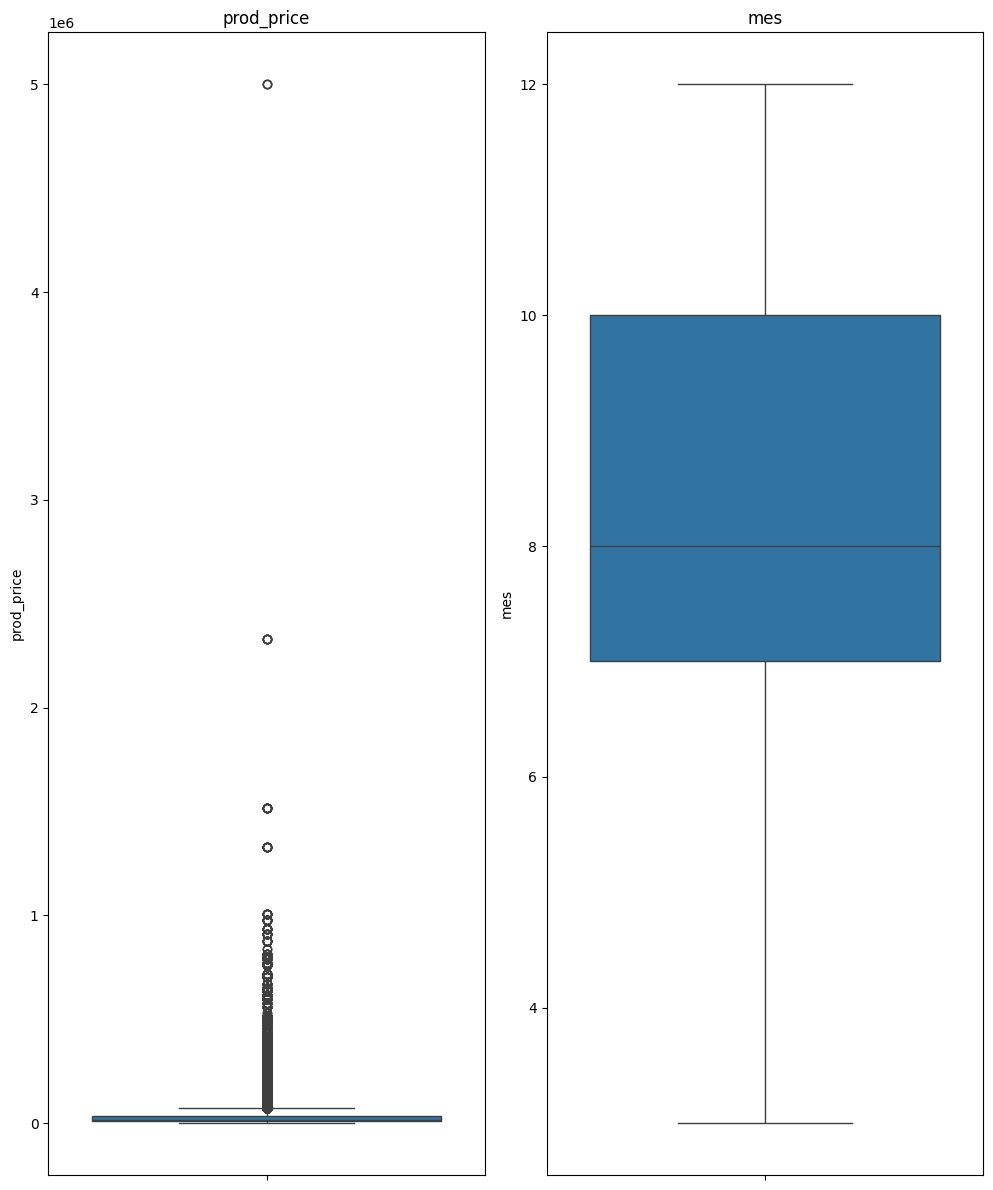

In [14]:
# Realizo verificación de valores Outliers
numeric_cols = consolidated_df.select_dtypes(include=[np.number]).columns
df_num = consolidated_df[numeric_cols]

# Verificación de valores Outliers
Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1

outliers = ((df_num < (Q1 - 1.5 * IQR)) | (df_num > (Q3 + 1.5 * IQR))).sum()
print("\nNúmero de outliers por variable:\n", outliers)

# Visualización de outliers con boxplots
plt.figure(figsize=(20, 12))
for i, column in enumerate(numeric_cols, 1):
    plt.subplot( (len(numeric_cols) + 3) // 4, 4, i)  # distribuye dinámicamente
    sns.boxplot(y=df_num[column])
    plt.title(column)

plt.tight_layout()
plt.show()



In [15]:
# Descripción general de los datos
consolidated_df.describe()

,prod_price,run_date,mes
count,1.697070e+05,169707,169707.000000
mean,3.295056e+04,2024-08-27 23:55:22.024430848,8.469126
min,3.000000e+02,2024-03-31 00:00:00,3.000000
25%,8.900000e+03,2024-07-26 00:00:00,7.000000
50%,1.750000e+04,2024-08-22 00:00:00,8.000000
75%,3.430000e+04,2024-10-03 00:00:00,10.000000
max,5.000000e+06,2024-12-23 00:00:00,12.000000
std,6.103701e+04,NaN,1.755853


In [16]:
# Segun la visualización de Cajas y bigotes, se observan 3 valors outliers, que, con la descripción de logra confirmar.

# Posiblemente se deban a valores insertadas de manera errorea. 

# Filtrar las filas donde prod_price es igual al valor máximo
max_price_rows = consolidated_df[consolidated_df['prod_price'] == consolidated_df['prod_price'].max()]

# Imprimir las filas con el valor máximo
print("Filas con el valor máximo de prod_price:")
print(max_price_rows)

Filas con el valor máximo de prod_price:
         category                            prod_name  prod_price   run_date  \
165980  Cubiertos                  ARMADURA DE OLIMPIA     5000000 2024-08-22   
177043  Cubiertos  TENEDOR TRAMONTINA IPNEMA AZUL X UN     5000000 2024-09-10   
184597  Cubiertos  TENEDOR TRAMONTINA IPNEMA AZUL X UN     5000000 2024-09-17   

       supermercado  mes  
165980       super6    8  
177043       super6    9  
184597       super6    9  


In [17]:
# Filtrar las filas donde prod_price es mayor o igual a 10,000,000
high_price_rows = consolidated_df[consolidated_df['prod_price'] >= 3000000]

# Imprimir las filas con valores de prod_price >= 10,000,000
print("Filas con valores de prod_price mayores o iguales a 3000000:")
print(high_price_rows)

Filas con valores de prod_price mayores o iguales a 3000000:
         category                            prod_name  prod_price   run_date  \
165980  Cubiertos                  ARMADURA DE OLIMPIA     5000000 2024-08-22   
177043  Cubiertos  TENEDOR TRAMONTINA IPNEMA AZUL X UN     5000000 2024-09-10   
184597  Cubiertos  TENEDOR TRAMONTINA IPNEMA AZUL X UN     5000000 2024-09-17   

       supermercado  mes  
165980       super6    8  
177043       super6    9  
184597       super6    9  


In [18]:
# Realizo la limpieza de los valores atipicos. 
high_price_indices = consolidated_df[consolidated_df['prod_price'] >= 3000000].index
consolidated_df = consolidated_df.drop(high_price_indices)

## 2. Análisis no supervisado:

- Enfoque de analisis no supervisado - K-means

In [19]:
consolidated_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 169704 entries, 0 to 218835
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   category      169704 non-null  category      
 1   prod_name     169704 non-null  object        
 2   prod_price    169704 non-null  int64         
 3   run_date      169704 non-null  datetime64[ns]
 4   supermercado  169704 non-null  category      
 5   mes           169704 non-null  int64         
dtypes: category(2), datetime64[ns](1), int64(2), object(1)
memory usage: 7.0+ MB


In [26]:
# Convierto a valores numericos mis variables categoricas con one-hot Encoder

from sklearn.preprocessing import OneHotEncoder
# Seleccionar las columnas categóricas
cols_to_encode = ['supermercado']

# Inicializar el OneHotEncoder
encoder = OneHotEncoder(sparse_output=False) 

# Ajustar y transformar los datos
encoded_array = encoder.fit_transform(consolidated_df[cols_to_encode])

# Obtener los nombres de las nuevas columnas
encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(cols_to_encode), index=consolidated_df.index)

# Concatenar al DataFrame original y eliminar las columnas originales
consolidated_df_encoded = pd.concat([consolidated_df.drop(columns=cols_to_encode), encoded_df], axis=1)

# Verificamos el resultado
print(consolidated_df_encoded.head())


  category                                       prod_name  prod_price  \
0   Vacuna             HAMBURGUESA DE CARNE 4 UN EFEGE CJA        5900   
1   Vacuna  HAMBURGUESA CLASICA CONCEPCION BURGER 6UN CJA        19900   
2   Vacuna               MINI HAMBURGUESA GUARANI 12UN CJA       28900   
3   Vacuna          HAMBURGUESA PREMIUM X 12UN GUARANI CJA       58700   
4   Vacuna                 HAMBURGUESA GUARANI PREMIUM 6UN       29900   

    run_date  mes  supermercado_stock  supermercado_super6  
0 2024-03-31    3                 1.0                  0.0  
1 2024-03-31    3                 1.0                  0.0  
2 2024-03-31    3                 1.0                  0.0  
3 2024-03-31    3                 1.0                  0.0  
4 2024-03-31    3                 1.0                  0.0  


In [27]:
print(consolidated_df_encoded.info())

<class 'pandas.core.frame.DataFrame'>
Index: 169704 entries, 0 to 218835
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   category             169704 non-null  category      
 1   prod_name            169704 non-null  object        
 2   prod_price           169704 non-null  int64         
 3   run_date             169704 non-null  datetime64[ns]
 4   mes                  169704 non-null  int64         
 5   supermercado_stock   169704 non-null  float64       
 6   supermercado_super6  169704 non-null  float64       
dtypes: category(1), datetime64[ns](1), float64(2), int64(2), object(1)
memory usage: 9.4+ MB
None


## 3. Modelado

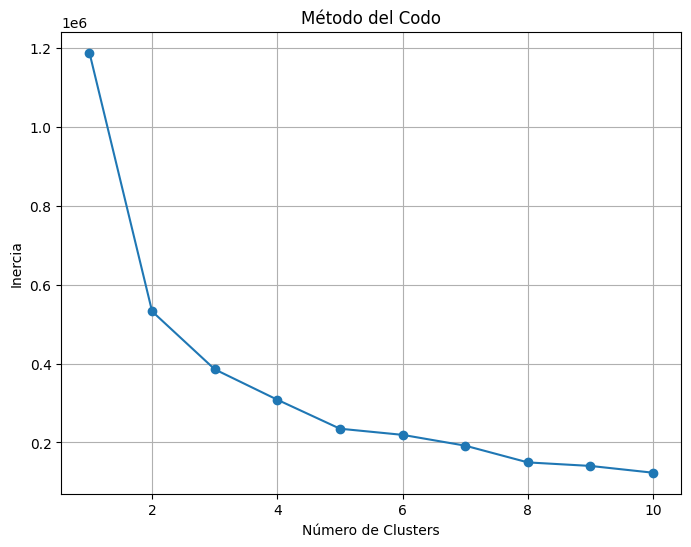

Coeficiente de Silueta: 0.6331


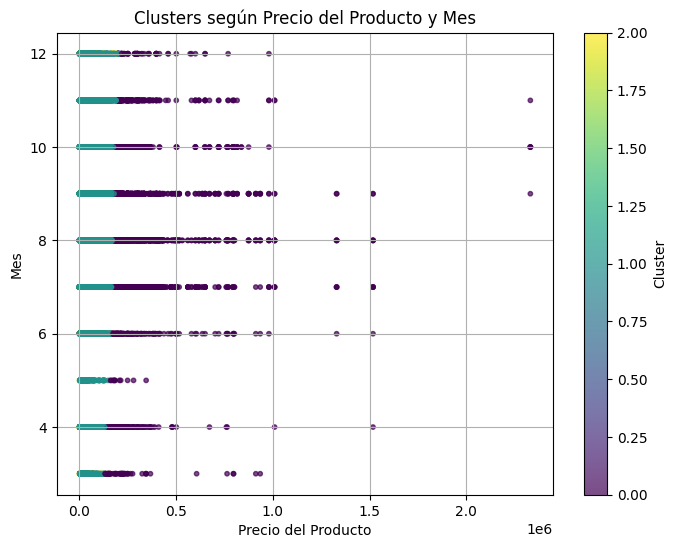

In [ ]:
# Guardo la columna por si la necesite nuevamente
category_col = consolidated_df_encoded['category'].copy()

# Preparo los datos para la clusterización (excluyendo campos no numéricos o que no aportan valor)
df_for_clustering = consolidated_df_encoded.drop(columns=['prod_name', 'run_date', 'category'])

# Escalado de los datos
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_for_clustering)

# Método del codo para encontrar el mejor número de clusters
inertia = []
range_k = range(1, 11)

for k in range_k:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Grafico del método del codo
plt.figure(figsize=(8, 6))
plt.plot(range_k, inertia, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.grid()
plt.show()

# Elijo el número óptimo de clusters 
optimal_k = 3 

# Aplicar KMeans con k óptimo
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
consolidated_df_encoded['Cluster'] = kmeans.fit_predict(data_scaled)

# Evaluación con Silhouette Score
silhouette_avg = silhouette_score(data_scaled, consolidated_df_encoded['Cluster'])
print(f"Coeficiente de Silueta: {silhouette_avg:.4f}")

# Visualización en 2D de Clusters con variables reales
plt.figure(figsize=(8, 6))
plt.scatter(consolidated_df_encoded['prod_price'], consolidated_df_encoded['mes'],
            c=consolidated_df_encoded['Cluster'], cmap='viridis', s=10, alpha=0.7)
plt.title('Clusters según Precio del Producto y Mes')
plt.xlabel('Precio del Producto')
plt.ylabel('Mes')
plt.colorbar(label='Cluster')
plt.grid()
plt.show()


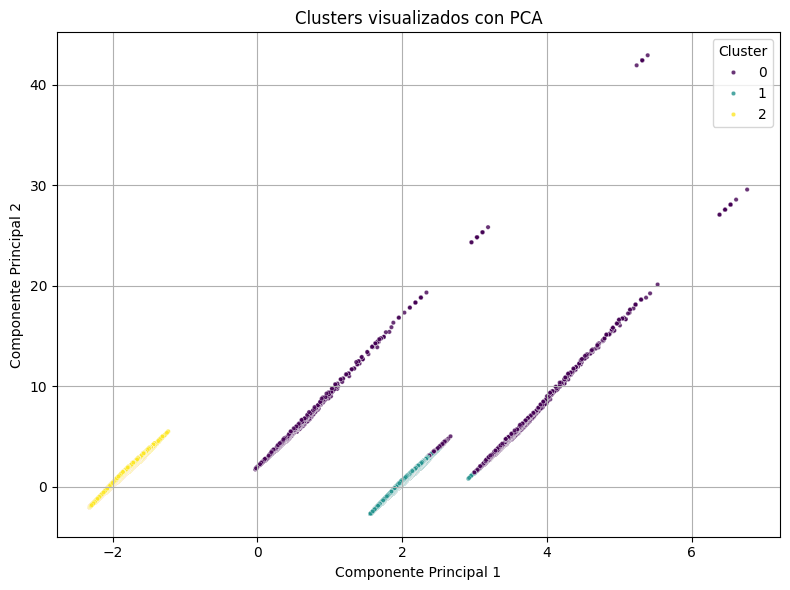

In [45]:
# Aplicar PCA para reducir a 2 dimensiones
pca = PCA(n_components=2)
pca_components = pca.fit_transform(data_scaled)

# Creo un DataFrame con los componentes principales
pca_df = pd.DataFrame(pca_components, columns=['PC1', 'PC2'], index=consolidated_df_encoded.index)
pca_df['Cluster'] = consolidated_df_encoded['Cluster']

# Visualizo los clusters usando los componentes principales
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='viridis', s=10, alpha=0.8)
plt.title('Clusters visualizados con PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Cluster')
plt.grid()
plt.tight_layout()
plt.show()


In [46]:
# Integro mis componentes a mi df consolidado
consolidated_df_encoded = pd.concat([consolidated_df_encoded, pca_df[['PC1', 'PC2']]], axis=1)


In [ ]:
# Agregar columnas originales categóricas al DataFrame con clusters
df_cluster_analysis = consolidated_df[['category', 'supermercado']].copy()
df_cluster_analysis['Cluster'] = consolidated_df_encoded['Cluster']

# Ver distribución general por cluster
print("Cantidad de productos por Cluster:")
print(df_cluster_analysis['Cluster'].value_counts(), "\n")

# Categorías más frecuentes por cluster
print("Top categorías por cluster:")
category_counts = df_cluster_analysis.groupby('Cluster')['category'].value_counts().groupby(level=0).nlargest(3)
print(category_counts)

print("\n")

# Supermercados más frecuentes por cluster
print("Top supermercados por cluster:")
super_counts = df_cluster_analysis.groupby('Cluster')['supermercado'].value_counts().groupby(level=0).nlargest(3)
print(super_counts)


Cantidad de productos por Cluster:
Cluster
2    83279
1    82993
0     3432
Name: count, dtype: int64 

Top categorías por cluster:
Cluster  Cluster  category            
0        0        Plantas/Accesorios      275
                  Premium                 245
                  Cocina                  174
1        1        Aceites                 690
                  Insecticidas            683
                  Alimento de Perros      634
2        2        Rubias                  755
                  Esmalte/Quitaesmalte    700
                  Tomatados               666
Name: count, dtype: int64


Top supermercados por cluster:
Cluster  Cluster  supermercado
0        0        super6           2078
                  stock            1354
1        1        super6          82993
                  stock               0
2        2        stock           83279
                  super6              0
Name: count, dtype: int64


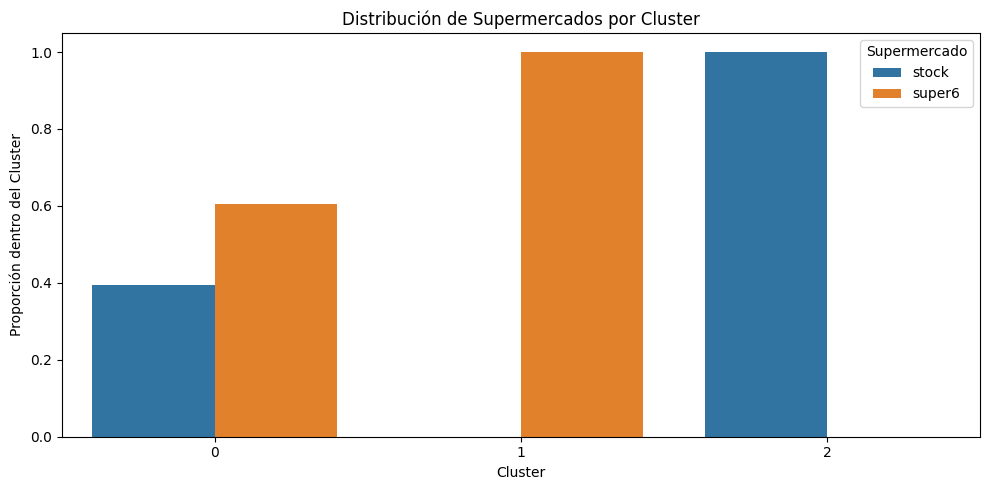

In [48]:
# Distribución de supermercados por cluster
super_dist = (
    df_cluster_analysis.groupby('Cluster')['supermercado']
    .value_counts(normalize=True)
    .reset_index(name='proportion')  # ← Nombre seguro
)

plt.figure(figsize=(10, 5))
sns.barplot(data=super_dist, x='Cluster', y='proportion', hue='supermercado')
plt.title('Distribución de Supermercados por Cluster')
plt.ylabel('Proporción dentro del Cluster')
plt.xlabel('Cluster')
plt.legend(title='Supermercado')
plt.tight_layout()
plt.show()


# Visualizo a nivel macro la distribución de los Clusters por Supermercados, donde se logra visualizar que:

# - Cluster 0: la distribución en este cluster, 40% para el supermercado Stock y 60% Super6
# - Cluster 1: la distribución de este cluster, se encuentra 100% en el Supermercado Super6
# - Cluster 2: la distribución de este cluster, se encuentra 100% en el Supermercado Stock

- Divido el dataset en conjuntos de entrenamiento y prueba, asegurándote de tener una proporción adecuada de cada clase en el conjunto de datos.

Epoch 1/50


C:\Users\diego\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


531/531 - 3s - 7ms/step - accuracy: 0.9872 - loss: 0.0528 - val_accuracy: 0.9972 - val_loss: 0.0076
Epoch 2/50
531/531 - 2s - 4ms/step - accuracy: 0.9978 - loss: 0.0063 - val_accuracy: 0.9992 - val_loss: 0.0028
Epoch 3/50
531/531 - 2s - 4ms/step - accuracy: 0.9991 - loss: 0.0031 - val_accuracy: 0.9991 - val_loss: 0.0024
Epoch 4/50
531/531 - 2s - 3ms/step - accuracy: 0.9993 - loss: 0.0021 - val_accuracy: 0.9991 - val_loss: 0.0021
Epoch 5/50
531/531 - 2s - 3ms/step - accuracy: 0.9993 - loss: 0.0020 - val_accuracy: 0.9995 - val_loss: 0.0015
Epoch 6/50
531/531 - 3s - 5ms/step - accuracy: 0.9994 - loss: 0.0018 - val_accuracy: 0.9991 - val_loss: 0.0022
Epoch 7/50
531/531 - 2s - 4ms/step - accuracy: 0.9994 - loss: 0.0016 - val_accuracy: 0.9990 - val_loss: 0.0022
Epoch 8/50
531/531 - 2s - 4ms/step - accuracy: 0.9994 - loss: 0.0017 - val_accuracy: 0.9993 - val_loss: 0.0019
Epoch 9/50
531/531 - 2s - 4ms/step - accuracy: 0.9994 - loss: 0.0015 - val_accuracy: 0.9995 - val_loss: 0.0014
Epoch 10/50


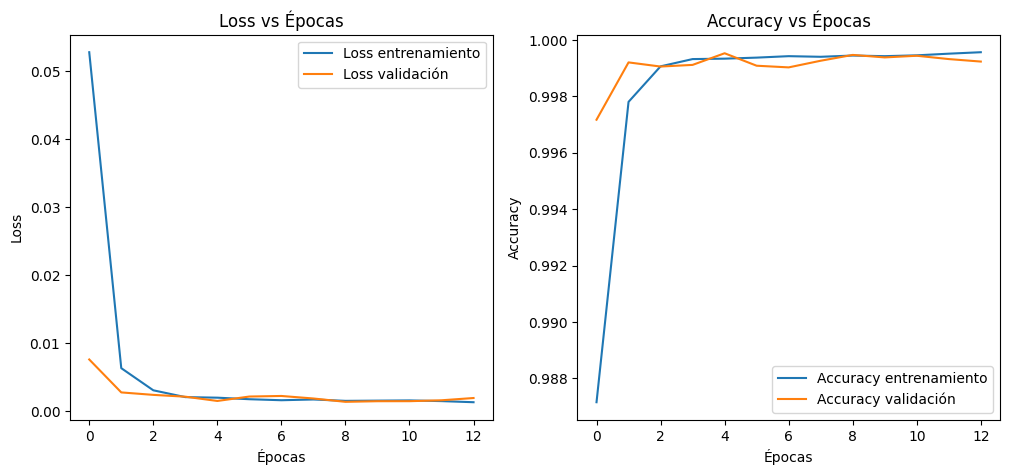

In [ ]:
# Importación de las librerias
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix


# Preparación de datos
features = ['PC1', 'PC2'] + [col for col in consolidated_df_encoded.columns if col.startswith('category_')]
X = consolidated_df_encoded[features].values
y = consolidated_df_encoded['Cluster'].values

# Codificación one-hot del target para clasificación múltiple
num_classes = len(np.unique(y))
y_encoded = tf.keras.utils.to_categorical(y, num_classes=num_classes)

# División en train y validation
X_train, X_val, y_train, y_val = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y)

# Escalado de features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Construcción del modelo MLP con Keras
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(num_classes, activation='softmax')
])

# Compilación del modelo
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Early stopping para evitar overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)

# Entrenamiento del modelo
history = model.fit(
    X_train_scaled, y_train,
    epochs=50,
    batch_size=256,
    validation_data=(X_val_scaled, y_val),
    callbacks=[early_stop],
    verbose=2
)

# Graficar métricas de entrenamiento y validación
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Loss entrenamiento')
plt.plot(history.history['val_loss'], label='Loss validación')
plt.title('Loss vs Épocas')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Accuracy entrenamiento')
plt.plot(history.history['val_accuracy'], label='Accuracy validación')
plt.title('Accuracy vs Épocas')
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.legend()

plt.show()



## 4. Evaluación del modelo:

Accuracy final en validación: 0.9995
1061/1061 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       686
           1       1.00      1.00      1.00     16599
           2       1.00      1.00      1.00     16656

    accuracy                           1.00     33941
   macro avg       1.00      1.00      1.00     33941
weighted avg       1.00      1.00      1.00     33941



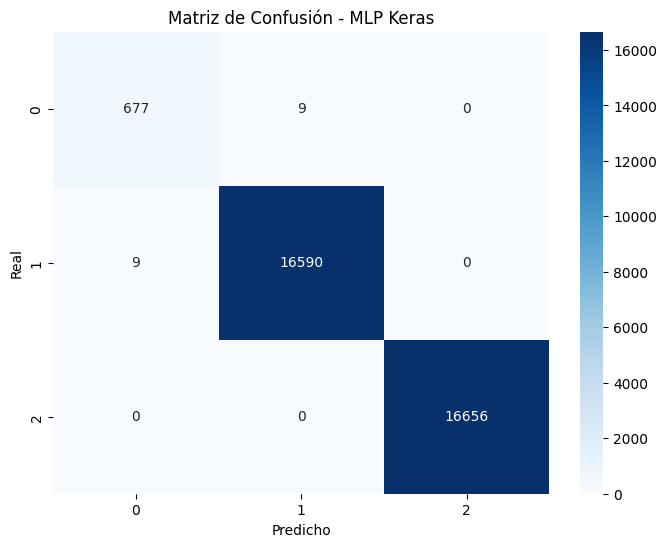

In [58]:
# Evaluación final en conjunto de validación
val_loss, val_accuracy = model.evaluate(X_val_scaled, y_val, verbose=0)
print(f"Accuracy final en validación: {val_accuracy:.4f}")

# Predicciones para matriz de confusión
y_val_pred = model.predict(X_val_scaled)
y_val_pred_labels = np.argmax(y_val_pred, axis=1)
y_val_true_labels = np.argmax(y_val, axis=1)

# Reporte de clasificación
print(classification_report(y_val_true_labels, y_val_pred_labels))

# Matriz de confusión
cm = confusion_matrix(y_val_true_labels, y_val_pred_labels)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusión - MLP Keras")
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.show()




## 5. Discusión y analisis

In [60]:
# En el proyecto se abordo datos sobre compras de 2 de los Supermercados más importantes de Paraguay (Stock y Superseis)

# El dataset con el que trabajé, contaba con muy pocas variables (Columnas), lo cual tenia un impacto importanto en todo el proceso desarrollado
# además de que los datos contenidos, son datos relativamente simples.


# Se podria intentar mejorar los modelos predictivos con Ingenieria de Caracteristicas, creando nuevas variables que puedan tener más correlaciones con las
# Variables a ser predichas